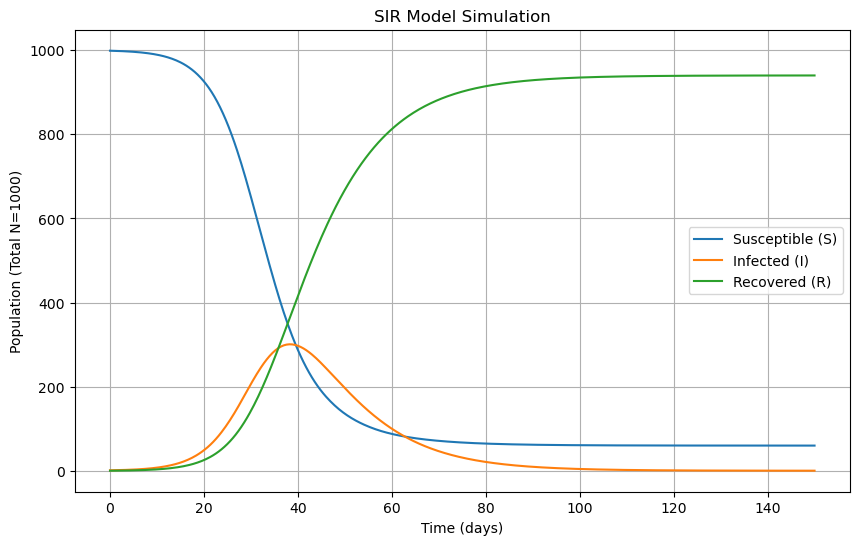

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def sir_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    
    return [dSdt, dIdt, dRdt]

N = 1000 
beta = 0.3e-3 
gamma = 0.1 
y0 = [999, 1, 0] 
t_span = [0, 150] 

sol = solve_ivp(
    sir_model, 
    t_span, 
    y0, 
    args=(beta, gamma), 
    dense_output=True
)
t_plot = np.linspace(t_span[0], t_span[1], 500)
S_plot, I_plot, R_plot = sol.sol(t_plot)

plt.figure(figsize=(10, 6))
plt.plot(t_plot, S_plot, label='Susceptible (S)')
plt.plot(t_plot, I_plot, label='Infected (I)')
plt.plot(t_plot, R_plot, label='Recovered (R)')
plt.xlabel('Time (days)')
plt.ylabel(f'Population (Total N={N})')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid(True)
plt.savefig('sir_simulation.png')
plt.show()

In [6]:
peak_idx = np.argmax(sol.y[1])
peak_val = sol.y[1][peak_idx]
peak_time = sol.t[peak_idx]

print(f"Part C.i: Infection Peak")
print(f"Peak infection value (I_max): {peak_val:.2f} individuals")
print(f"Peak infection time: Day {peak_time:.2f}")

R0 = (beta * y0[0]) / gamma 
print(f"Part C.ii: Basic Reproductive Number (R0)")
print(f"R0 = {R0:.3f}")

print(f"Part C.iii: Dynamics")
print("Analysis of S, I, R curves to be written in README.md.")

Part C.i: Infection Peak
Peak infection value (I_max): 298.42 individuals
Peak infection time: Day 37.05
Part C.ii: Basic Reproductive Number (R0)
R0 = 2.997
Part C.iii: Dynamics
Analysis of S, I, R curves to be written in README.md.


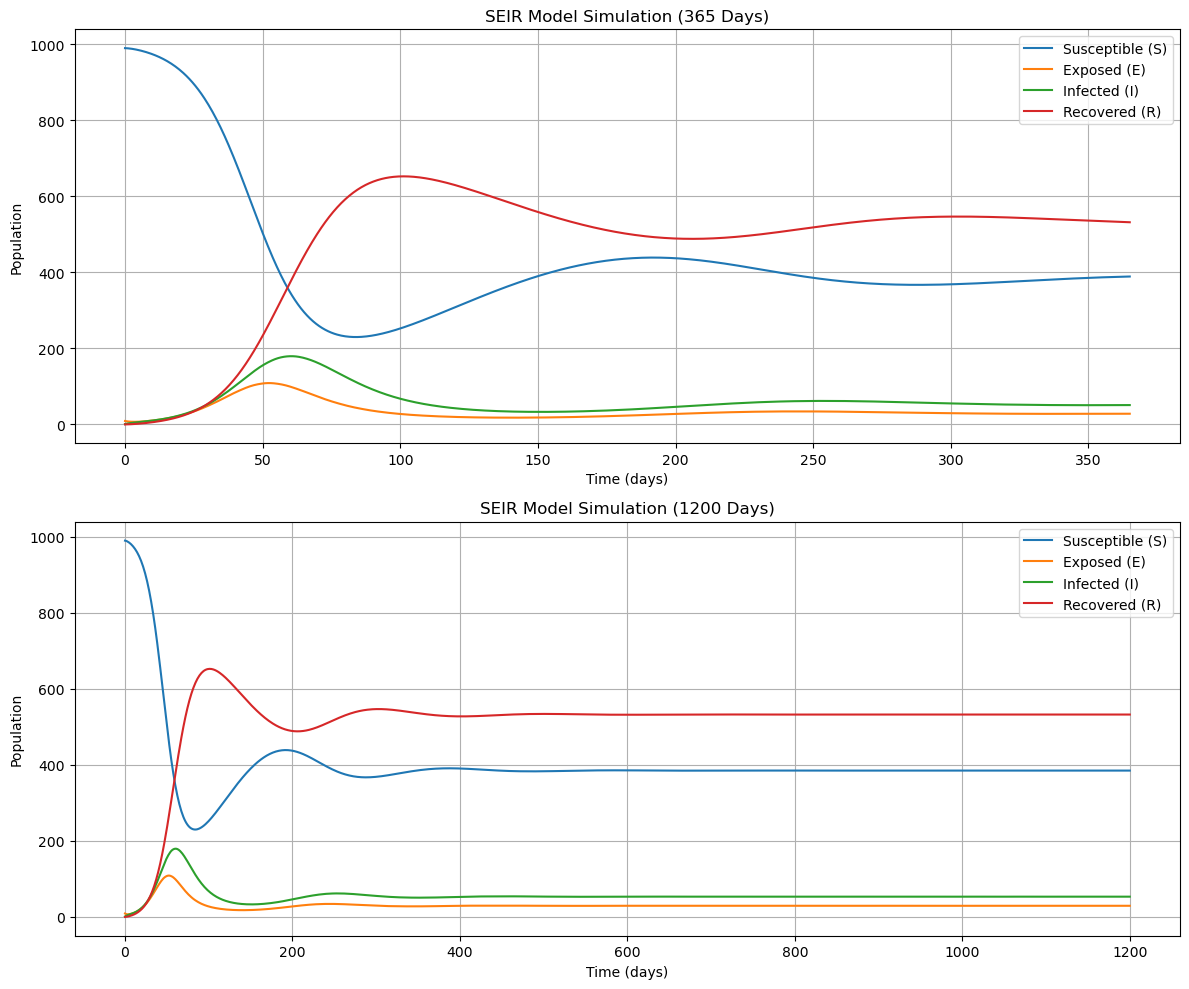

In [7]:

def seir_model(t, y, beta, gamma, sigma, mu, N):
    S, E, I, R = y
    dSdt = mu * N - beta * S * I - mu * S
    dEdt = beta * S * I - (sigma + mu) * E
    dIdt = sigma * E - (gamma + mu) * I
    dRdt = gamma * I - mu * R
    return [dSdt, dEdt, dIdt, dRdt]

sigma = 0.2
mu = 0.01
y0_seir = [990, 9, 1, 0] 
N_seir = sum(y0_seir)   
time_spans = [365, 1200]

plt.figure(figsize=(12, 10))
for i, duration in enumerate(time_spans):
    t_span_seir = [0, duration]
    
    sol_seir = solve_ivp(
        seir_model,
        t_span_seir,
        y0_seir,
        args=(beta, gamma, sigma, mu, N_seir),
        dense_output=True
    )
    
    t_plot_seir = np.linspace(t_span_seir[0], t_span_seir[1], 1000)
    S_plot, E_plot, I_plot, R_plot = sol_seir.sol(t_plot_seir)

    plt.subplot(2, 1, i + 1)
    plt.plot(t_plot_seir, S_plot, label='Susceptible (S)')
    plt.plot(t_plot_seir, E_plot, label='Exposed (E)')
    plt.plot(t_plot_seir, I_plot, label='Infected (I)')
    plt.plot(t_plot_seir, R_plot, label='Recovered (R)')
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    plt.title(f'SEIR Model Simulation ({duration} Days)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'SEIR Model Simulation ({duration} Days)')

plt.tight_layout()
plt.show()

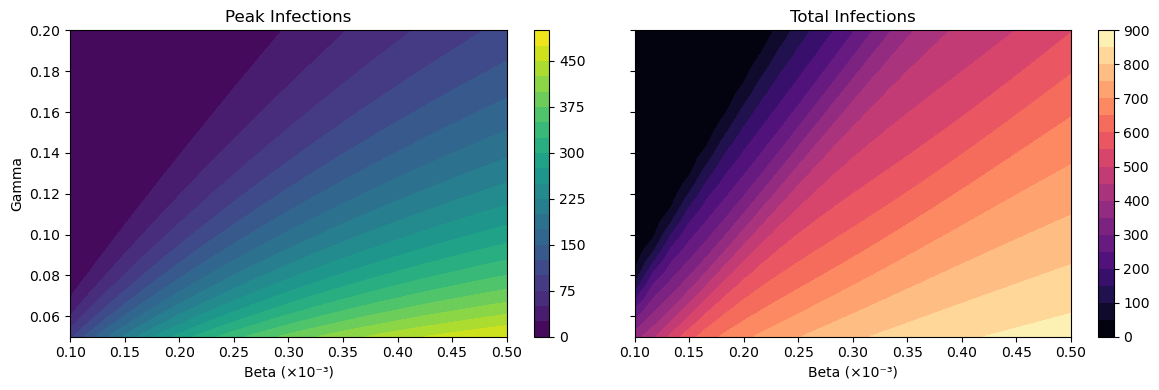

In [8]:

beta_values = np.linspace(0.1e-3, 0.5e-3, 25)
gamma_values = np.linspace(0.05, 0.2, 25)
t_eval = np.linspace(0, 365, 366)

peak_infections = np.zeros((len(gamma_values), len(beta_values)))
total_infections = np.zeros_like(peak_infections)

for i, gamma_val in enumerate(gamma_values):
    for j, beta_val in enumerate(beta_values):
        sol = solve_ivp(
            seir_model, [0, 365], y0_seir,
            args=(beta_val, gamma_val, sigma, mu, N_seir),
            t_eval=t_eval
        )
        I = sol.y[2]
        S = sol.y[0]
        peak_infections[i, j] = np.max(I)
        total_infections[i, j] = N_seir - S[-1]

# --- Plot heatmaps ---
X, Y = np.meshgrid(beta_values * 1e3, gamma_values)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

im1 = axes[0].contourf(X, Y, peak_infections, 20, cmap='viridis')
axes[0].set_title('Peak Infections')
axes[0].set_xlabel('Beta (×10⁻³)')
axes[0].set_ylabel('Gamma')
fig.colorbar(im1, ax=axes[0])

im2 = axes[1].contourf(X, Y, total_infections, 20, cmap='magma')
axes[1].set_title('Total Infections')
axes[1].set_xlabel('Beta (×10⁻³)')
fig.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.savefig('sensitivity_analysis.png')
plt.show()
